y_pred =  [13.177 18.721 10.662 15.949 24.468  7.523 30.723 26.626 23.794 22.594
 20.978 17.415 26.796 20.298 20.603 18.734 13.382 17.233 20.53   9.98
 26.529  7.737 11.692 25.082 21.794 11.009  8.845 19.676 25.286 32.499
 13.248 21.687 27.014 16.99  18.676 23.822 17.027 15.094 28.42  33.48
 12.279 18.467 14.551 10.814 17.188 20.522 24.896 15.62  20.082 14.699
  8.588 10.967  7.822 18.676 19.23   9.678 13.981 18.489 32.554  7.54
 21.409 20.364 10.887 24.126 33.736 26.703 26.083 13.302  7.665 28.156
 16.924 25.264 17.632 19.237 15.852 32.084 10.641 19.485 30.641 32.053
 13.017 15.629 16.289 22.074 18.752 13.249 14.629 18.657 22.347 10.895
 32.096 24.386 16.667 24.455 16.175 28.826 28.618 18.977 26.785 21.836
 17.221 26.82  14.102  9.855 10.959 29.959 14.989]
y_test =  [13.8 19.2 11.1 16.2 19.   8.1 30.7 27.4 24.2 22.3 22.2 15.6 28.2 21.5
 20.  18.8 13.8 17.2 19.2 10.8 27.   8.7 12.3 25.1 22.2 11.2  9.5 20.
 25.1 31.8 13.6 21.7 27.4 18.1 17.9 22.9 16.8 15.2 29.1 33.1 13.2 16.3
 15.3 11.1

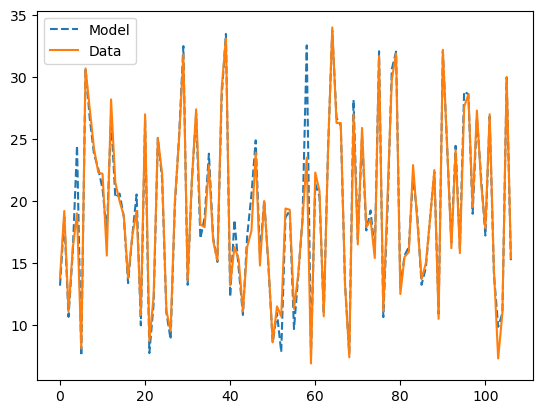

Mean Squared Error: 1.6710059999999993
R-squared: 0.9624708331935652

Feature Importances:
            Feature    Importance
1           MaxTemp  9.877011e-01
9       Humidity3pm  3.016464e-03
14          Temp9am  8.202555e-04
3       Evaporation  7.465214e-04
0           MinTemp  7.266240e-04
..              ...           ...
23  WindGustDir_NNE  8.370746e-07
30   WindGustDir_SW  5.288853e-07
33  WindGustDir_WSW  5.207654e-07
68   WindDir3pm_nan  3.684136e-07
34  WindGustDir_nan  1.213889e-07

[69 rows x 2 columns]


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, classification_report


df = pd.read_csv('weather.csv')

# Convert categorical features to numerical
df['RainTomorrow'] = df['RainTomorrow'].map({'No': 0, 'Yes': 1})
df['RainToday'] = df['RainToday'].map({'No': 0, 'Yes': 1})

# Identify the categorical columns you want to one-hot encode
categorical_cols = ['WindGustDir', 'WindDir9am', 'WindDir3pm']

# Create a OneHotEncoder object
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Fit and transform the categorical columns
encoded_data = encoder.fit_transform(df[categorical_cols])

# Get the feature names for the new encoded columns
feature_names = encoder.get_feature_names_out(categorical_cols)

# Create a new DataFrame with the one-hot encoded data
encoded_df = pd.DataFrame(encoded_data, columns=feature_names)

# Concatenate the one-hot encoded DataFrame with the original DataFrame
df_encoded = pd.concat([df.drop(categorical_cols, axis=1), encoded_df], axis=1)

# Separate features (X) and target (y)
X = df_encoded.drop(columns = ['Temp3pm'])# all columns except the rain tmr
y = df_encoded['Temp3pm'] # last

# Handle missing values
X = X.dropna()
y = y.loc[X.index] # y only has rows corresponding to row indices of X

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = RandomForestRegressor()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print('y_pred = ' , y_pred)
print('y_test = ' , y_test.to_numpy())
plt.plot(y_pred, '--', label='Model')
plt.plot(y_test.to_numpy(), label='Data')
plt.legend()
plt.show()

# Evaluate the regression model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
# Get feature importances
importances = model.feature_importances_
# Create a DataFrame to store feature names and their importances
feature_importances = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})
# Sort the DataFrame by importance in descending order
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
# Print the feature importances
print("\nFeature Importances:")
print(feature_importances)

# Neural Operators

Quinn Heng-Martin, Brandt Benfield; Colorado State University 2025

## Introduction

Neural Networks (NNs) are often described as universal function approximators, mapping an arbitrary set of inputs to outputs. This is certainly a very useful task, however in physics and engineering we are often interested in examining systems that produce different functions characterized by the same underlying behavior, depending on some initial or boundary conditions. It is the underlying behaviour we are interested in, not the particular function. That is, we seek to find mappings from functions to functions. This actually expands our problem space more than one might think: since there are an infinite number of functions that are completely unrelated (the family $\delta(x-x_0)$ for example), our parameter space is actually *infinite dimensional*. This might seem an insurmountable challenge, but NNs provide a nice starting point. This function-to-function mapping is precisely what an operator is, so a NN-derived architecture to solve these problems, naturally, is called a Neural Operator (NO). NOs were originally proposed by researchers at Caltech in 2020 [[1](https://arxiv.org/abs/2010.08895)] [[2](https://arxiv.org/abs/2108.08481)] - We seek to use the NO library published by the this team ([arxiv](https://arxiv.org/abs/2412.10354)) to create short- to medium-term weather forecasts for Colorado (a conveniently rectangular state).

### On the Technical Details
 ... how a NO works... 

 A particularly popular implementation of Neural Operators is the Fourier Neural Operator, as laid out by the same team.

 ... specifics about FNOs...

### The Gameplan (Methodology):

All training data is taken from the [
ERA5 hourly data on single levels from 1940 to present](https://doi.org/10.24381/cds.adbb2d47) and converted to CSV format for communicative/hand-in purposes.

In [2]:
# Neural Operator install Options:
#!pip install neuraloperator
#!pip install git+https://github.com/neuraloperator/neuraloperator.git
#!conda install conda-forge::neuraloperator

from neuralop.training import Trainer
from neuralop.models import FNO
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import torch
from torch.utils.data import Dataset, DataLoader

# Dataset Preparation
class WeatherTensorDataset(Dataset):          # This class is a custom dataset loader that will load preprocessed
    def __init__(self, data_path):            # weather data (saved as a .pt file) into PyTorch’s data pipeline.
        self.samples = torch.load(data_path)

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, idx):
        return {'x': self.samples[idx][0], 'y': self.samples[idx][1]}

First, let's load up our data and get a look at it:

,valid_time,latitude,longitude,u10,v10,surface_dewpoint,surface_temperature,surface_pressure,u10n,v10n
0,2022-01-01 03:00:00,41.0,-109.0,0.694458,-0.103119,261.02032,262.44580,77215.0,0.223984,0.018707
1,2022-01-01 03:00:00,41.0,-108.5,0.498169,0.364655,260.49298,261.94580,77910.0,0.170273,0.116364
2,2022-01-01 03:00:00,41.0,-108.0,-0.283081,0.928131,260.55157,262.17627,77852.0,-0.130508,0.344879
3,2022-01-01 03:00:00,41.0,-107.5,-1.179565,1.212311,259.16290,261.19970,75851.0,-0.657852,0.766754
4,2022-01-01 03:00:00,41.0,-107.0,-0.895386,0.902740,258.49884,260.38330,73532.0,-0.682266,0.731598


,valid_time,latitude,longitude,u10,v10,surface_dewpoint,surface_temperature,surface_pressure,u10n,v10n
135790,2022-09-09 09:00:00,37.5,-104.0,1.801392,0.856415,277.81055,291.61133,83465.44,0.990417,0.697998
3787,2022-01-08 03:00:00,41.0,-105.5,3.019852,0.973526,267.67798,276.07422,75733.81,2.650558,0.838745
152167,2022-10-09 21:00:00,40.5,-105.5,-0.486999,-0.877701,264.75050,291.30005,76532.44,-0.564712,-1.024628
70218,2022-05-11 03:00:00,40.5,-107.5,-1.800736,1.842178,269.98462,281.17798,76521.44,-0.601471,0.617538
28155,2022-02-22 03:00:00,38.5,-109.0,2.078079,2.293976,269.23700,274.76940,78940.31,2.003555,2.173935


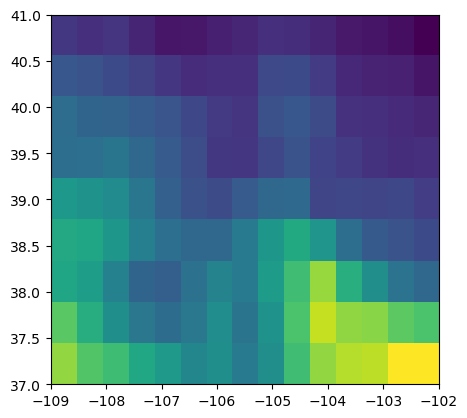

In [3]:
df = pd.read_csv('data2022/accum_data.csv')
df.valid_time = df.valid_time.astype('datetime64[s]')

W = len(df.longitude.unique())
H = len(df.latitude.unique())
T = len(df.valid_time.unique())
extent = (df.longitude.min(), df.longitude.max(), df.latitude.min(), df.latitude.max())

display(df.head())
display(df.sample(5))
initial_temp = (df[df.valid_time=='2022-01-01 3:00:00']
                .pivot(index='latitude',columns='longitude',
                       values='surface_temperature')
                .sort_index(ascending=False)
               )

plt.imshow(initial_temp, aspect=W/H, extent=extent)

Nice! next up, a neural operator will benefit from knowing the coordinates of it's data, including time. Let's make a float-valued time that a NO can understand:

In [4]:
# Assign each time a timestep float
times = df['valid_time'].sort_values().unique()
dt = times[1]-times[0] # The model will see a day that is 24H/dt ticks long
df['time'] = (df['valid_time']-times[0])/dt
(times-times[0])/dt

array([0.000e+00, 1.000e+00, 2.000e+00, ..., 1.457e+03, 1.458e+03,
       1.459e+03])

In [5]:
# Re-package everything into 3d data

# Drop valid_time and move all coordinate channels to the end as the model expects: (there's definitely a more elegant way to do this..)
channels = list(df.columns.drop(['valid_time', 'latitude', 'longitude']))+['latitude','longitude']
C = len(channels)
data_array = (df[channels]
              .sort_values(['time', 'latitude', 'longitude'])
              .values
              .reshape([T,H,W,C]) 
             )
print(f'{data_array.shape = } = (T, H, W, C)')

data_array.shape = (1460, 9, 15, 10) = (T, H, W, C)


As a sanity check, let's show that inital temperature distribution again:

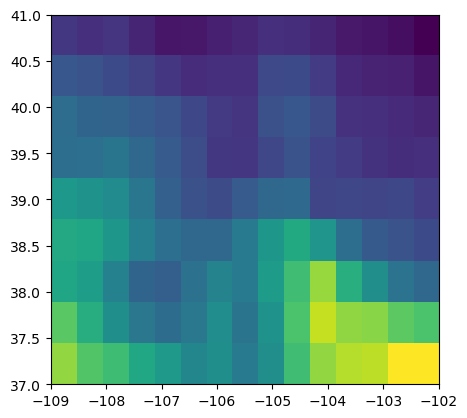

In [6]:
plt.imshow(data_array[0,::-1,:,3].astype(float), aspect=W/H, extent=extent)

Looking good! Brandt, could you figure out how to add a temperature scale to this?

In [7]:
data = torch.tensor(data_array, dtype=torch.float32)

In [8]:
# Make some input/output pairs:

# TODO apparently i was thinking in two directions at some point, this needs looked at

data = data.transpose(0,3)  # Place channels up front to appease neuralop (careful about running this line multiple times!)
input_tensor = data[:,:,:,:-1]
input_tensors = input_tensor.split(split_size=1,dim=3)

In [9]:
output_tensor = data[:,:,:,1:]  # Try to predict the next timestep
output_tensor = data[[3],:,:,1:]  # Just try to predict the next temp

In [10]:
output_tensors = output_tensor.split(split_size=1,dim=3)

# Split data into pairs of timesteps. Given one timestep, the model should predict the next one
from itertools import pairwise
chunks = map(torch.squeeze, data.split(1,dim=3))
chunks = tuple(pairwise(chunks))
chunks = list(zip(map((lambda x: x.squeeze(3)), input_tensor.split(1,dim=3)), 
                  map((lambda x: x.squeeze(3)), output_tensor.split(1,dim=3))))
print(f'{chunks[0][1].shape = }')
torch.save(chunks, 'weather_chunks.pt')
tuple(pairwise(torch.tensor((1,2,3,4,5,6)).split(1, dim=0)))  # Illustration of split and pairwise working together

chunks[0][1].shape = torch.Size([1, 9, 15])


((tensor([1]), tensor([2])),
 (tensor([2]), tensor([3])),
 (tensor([3]), tensor([4])),
 (tensor([4]), tensor([5])),
 (tensor([5]), tensor([6])))

In [11]:
# Load and clean the CSV file
df = pd.read_csv('data2022/accum_data.csv')

# Grid creation
times = sorted(df['valid_time'].unique()) # Get unique times

input_vars = ['u10', 'v10', 'surface_pressure', 'u10n', 'v10n']
output_var = 'surface_temperature'

grids = []

lat_vals = sorted(df['latitude'].unique()) # Unique lat
lon_vals = sorted(df['longitude'].unique()) # Unique long

H = len(lat_vals) # Height (number of latitude values)
W = len(lon_vals)  # Width (number of longitude values)

# Process the data for each time step
for time in tqdm(times):   # tqdm(times) progress bar for visualization
    slice_df = df[df['valid_time'] == time] # Get data for the current time step


    # Build 2D grid for each input variable
    input_channels = [slice_df
                      .pivot(index='latitude', columns='longitude', values=var)
                      .to_numpy()
                      for var in input_vars
                     ]
    # for var in input_vars:
    #     pivot = slice_df.pivot(index='latitude', columns='longitude', values=var)
    #     grid = pivot.to_numpy() # Creates a 2D grid using pandas
    #     input_channels.append(grid)

    # Build target grid
    target_pivot = slice_df.pivot(index='latitude', columns='longitude', values=output_var)
    target_grid = target_pivot.to_numpy()

    # Stack into tensors
    input_tensor = torch.tensor(np.stack(input_channels), dtype=torch.float32)  # Shape: [C, H, W]  (C is the # of input variables, H is the # of lat points, and W is the # of long points)
    target_tensor = torch.tensor(target_grid[np.newaxis, :, :], dtype=torch.float32)  # Shape: [1, H, W]

    grids.append((input_tensor, target_tensor))

# Save the dataset to a file
torch.save(grids, 'weather_dataset.pt')  # List of (input, target) pairs

 17%|██████▉                                 | 252/1460 [00:05<00:28, 42.35it/s]


KeyboardInterrupt: 

In [69]:
# Dataset Splitting
full_dataset = WeatherTensorDataset('weather_dataset.pt')

train_size = int(0.8 * len(full_dataset)) #80% for train
test_size = len(full_dataset) - train_size

train_dataset, test_dataset = torch.utils.data.random_split(full_dataset, [train_size, test_size])

train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=4, shuffle=False)

# Model Setup
in_channels = 5 # # of input
out_channels = 1 # # of output

# Initialize the model
model = FNO(n_modes=(12, 12), hidden_channels=32, in_channels=in_channels, out_channels=out_channels)

# Set device to GPU if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

# Initialize optimizer and scheduler
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)  # Adam optimizer with learning rate 0.001
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.5) # Learning rate scheduler

# Training Setup
trainer = Trainer(model=model, n_epochs=2, device=device)

# Wrap the test_loader in a dictionary
test_loaders = {'test': test_loader}
full_dataset[0]['x'].shape, full_dataset[0]['y'].shape

(torch.Size([5, 9, 15]), torch.Size([1, 9, 15]))

In [11]:
# Dataset Splitting
full_dataset = WeatherTensorDataset('weather_chunks.pt')
full_dataset[0]['x'].shape

train_size = int(0.8 * len(full_dataset)) #80% for train
test_size = len(full_dataset) - train_size

train_dataset, test_dataset = torch.utils.data.random_split(full_dataset, [train_size, test_size])

train_loader = DataLoader(train_dataset, batch_size=1, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)

# Model Setup
in_channels = C # # of input
out_channels = 1 # # of output

# Initialize the model
model = FNO(n_modes=(12, 12), hidden_channels=32, in_channels=in_channels, out_channels=out_channels)

# Set device to GPU if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

# Initialize optimizer and scheduler
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)  # Adam optimizer with learning rate 0.001
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.5) # Learning rate scheduler

# Training Setup
trainer = Trainer(model=model, n_epochs=10, device=device, eval_interval=2, verbose=True)

# Wrap the test_loader in a dictionary
test_loaders = {'test': test_loader}

In [12]:
train_dataset[0]['x'].shape, train_dataset[0]['y'].shape

(torch.Size([10, 9, 15]), torch.Size([1, 9, 15]))

In [13]:
# Train the model
trainer.train(train_loader, test_loaders, optimizer, scheduler)

Training on 1167 samples
Testing on [292] samples         on resolutions ['test'].
Raw outputs of shape torch.Size([1, 1, 9, 15])


[W508 07:18:36.884757304 NNPACK.cpp:62] Could not initialize NNPACK! Reason: Unsupported hardware.


[0] time=42.87, avg_loss=0.0933, train_err=0.0933
Eval: test_l2=0.0394
[2] time=51.30, avg_loss=0.0577, train_err=0.0577
Eval: test_l2=0.0380
[4] time=42.66, avg_loss=0.0525, train_err=0.0525
Eval: test_l2=0.0368
[6] time=44.52, avg_loss=0.0507, train_err=0.0507
Eval: test_l2=0.0352
[8] time=44.67, avg_loss=0.0431, train_err=0.0431
Eval: test_l2=0.0374


{'train_err': 0.04182377248968939,
 'avg_loss': 0.04182377248968939,
 'avg_lasso_loss': None,
 'epoch_train_time': 45.55785697400279}

Strangely, I only get this NNPACK! warning occasionally. It seems to lead to about a 3x slowdown. 

Looking at the losses, it looks like all the learning happened in just two or three epochs! So how's it look?

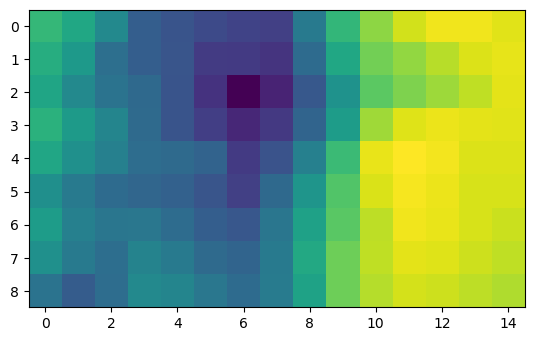

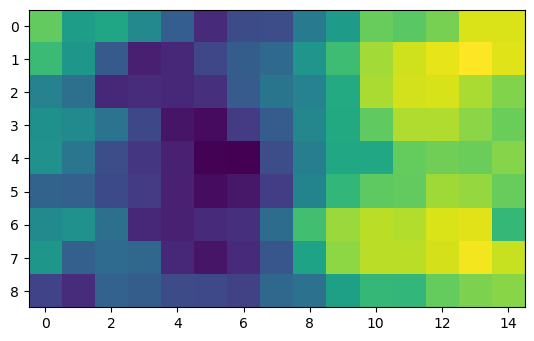

In [20]:
x_example = test_dataset[73]['x'].unsqueeze(0)
y_expected = test_dataset[73]['y']
y_predicted = model(x_example)
plt.imshow(y_expected.squeeze())
plt.show()
plt.imshow(y_predicted.squeeze().detach().numpy())
plt.show()

In [17]:
%timeit y_predicted = model(x_example)

9.63 ms ± 334 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


Not terrible... let's crank it up!

## Second Go Round

In [23]:
from itertools import pairwise

#tensors = [t[0] for t in grids]
#data_block = torch.stack(tensors, stackdim:=3)
#chunks = data_block.split(20,stackdim)
#torch.save(tuple(pairwise(chunks)), 'weather_chunks.pt')

# Dataset Splitting
time_dim=3
chunks = map(torch.squeeze, data.split(4,dim=time_dim))
chunks = tuple(pairwise(chunks))
chunks = list(zip(map((lambda x: x.squeeze(3)), input_tensor.split(1, dim=time_dim)), 
                  map((lambda x: x.squeeze(3)), output_tensor.split(1, dim=time_dim))))

full_dataset = WeatherTensorDataset('weather_chunks.pt')

train_size = int(0.8 * len(full_dataset)) #80% for train
test_size = len(full_dataset) - train_size

train_dataset, test_dataset = torch.utils.data.random_split(full_dataset, [train_size, test_size])

train_loader = DataLoader(train_dataset, batch_size=1, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)

train_dataset[0]['x'].shape # C x T x H x W, where T is the number of observation times

torch.Size([10, 9, 15])

In [92]:
# Model Setup
in_channels = len(input_vars) # # of input
out_channels = len(output_vars:=input_vars) # # of output

# Initialize the model
model = FNO(n_modes=(12, 12, 12), hidden_channels=32, in_channels=in_channels, out_channels=out_channels)

# Set device to GPU if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

# Initialize optimizer and scheduler
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)  # Adam optimizer with learning rate 0.001
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.5) # Learning rate scheduler

# Training Setup
trainer = Trainer(model=model, n_epochs=10, eval_interval=5, device=device, verbose=True)

# Wrap the test_loader in a dictionary
test_loaders = {'test': test_loader}

trainer.train(train_loader, test_loaders, optimizer, scheduler)

Training on 13 samples
Testing on [4] samples         on resolutions ['test'].
Raw outputs of shape torch.Size([1, 5, 20, 9, 15])


RuntimeError: The size of tensor a (20) must match the size of tensor b (15) at non-singleton dimension 2

In [ ]:
#torch.save(model.state_dict(), 'MondayMorningModel.pt')

In [ ]:
model.forward(test_dataset[0]['x'][:,-1,:,:].unsqueeze(0).unsqueeze(0))

RuntimeError: Given groups=1, weight of size [64, 8, 1], expected input[1, 4, 675] to have 8 channels, but got 4 channels instead

In [55]:
out = model(test_dataset[0]['x'].unsqueeze(0))
prediction = out.squeeze()[2,:,1,1]
test = test_dataset[0]['y'][2,:,1,1]
prediction,test

(tensor([3103.1250, 3105.5190, 3128.3618, 3137.9329, 3136.9014, 3131.4380,
         3141.0750, 3135.9158, 3130.0901, 3117.6890, 3126.0916, 3128.9338,
         3122.9734, 3111.7693, 3117.8486, 3119.5728, 3124.4333, 3124.2344,
         3138.3450, 3138.8315], grad_fn=<SelectBackward0>),
 tensor([78368.9375, 78501.1875, 78720.1875, 78562.4375, 78514.8750, 78504.5000,
         78673.2500, 78487.8125, 78263.5625, 78130.5000, 78081.0000, 77709.0000,
         77457.5625, 77330.0000, 77300.6875, 77135.3750, 77193.7500, 77416.5625,
         77623.8750, 77686.8125]))

## Appendix: Data Conversion

In [24]:
#please don't remove I need them every time I pull from main
#!apt-get install -y libeccodes0 libeccodes-dev
#!pip install cfgrib xarray

In [27]:
import xarray as xr

# Load GRIB (or grb) file (from what I found they act the same)
ds = xr.open_dataset('CaribbeanWeatherTest.wind.7days.grb', engine='cfgrib')

# Inspect the dataset
print(ds)
ds.variables.keys()

<xarray.Dataset> Size: 158kB
Dimensions:            (step: 27, latitude: 22, longitude: 33)
Coordinates:
    time               datetime64[ns] 8B ...
  * step               (step) timedelta64[ns] 216B 0 days 06:00:00 ... 6 days...
    heightAboveGround  float64 8B ...
  * latitude           (latitude) float64 176B 9.0 10.0 11.0 ... 28.0 29.0 30.0
  * longitude          (longitude) float64 264B 263.0 264.2 ... 301.8 303.0
    valid_time         (step) datetime64[ns] 216B ...
Data variables:
    u10                (step, latitude, longitude) float32 78kB ...
    v10                (step, latitude, longitude) float32 78kB ...
Attributes:
    GRIB_edition:            1
    GRIB_centre:             kwbc
    GRIB_centreDescription:  US National Weather Service - NCEP
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             US National Weather Service - NCEP
    history:                 2025-05-05T19:30 GRIB to CDM+CF via cfgrib-0.9.1...


/usr/local/lib/python3.11/dist-packages/cfgrib/xarray_plugin.py:131: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  vars, attrs, coord_names = xr.conventions.decode_cf_variables(


KeysView(Frozen({'time': <xarray.Variable ()> Size: 8B
[1 values with dtype=datetime64[ns]]
Attributes:
    long_name:      initial time of forecast
    standard_name:  forecast_reference_time, 'step': <xarray.IndexVariable 'step' (step: 27)> Size: 216B
array([ 21600000000000,  43200000000000,  64800000000000,  86400000000000,
       108000000000000, 129600000000000, 151200000000000, 172800000000000,
       194400000000000, 216000000000000, 237600000000000, 259200000000000,
       280800000000000, 302400000000000, 324000000000000, 345600000000000,
       367200000000000, 388800000000000, 410400000000000, 432000000000000,
       453600000000000, 475200000000000, 496800000000000, 518400000000000,
       540000000000000, 561600000000000, 583200000000000],
      dtype='timedelta64[ns]')
Attributes:
    long_name:      time since forecast_reference_time
    standard_name:  forecast_period, 'heightAboveGround': <xarray.Variable ()> Size: 8B
[1 values with dtype=float64]
Attributes:
    long_

In [23]:
# For example, if 'time' is a variable:
time = ds['time']
print(time)

<xarray.DataArray 'time' ()> Size: 8B
[1 values with dtype=datetime64[ns]]
Coordinates:
    time               datetime64[ns] 8B ...
    heightAboveGround  float64 8B ...
Attributes:
    long_name:      initial time of forecast
    standard_name:  forecast_reference_time
